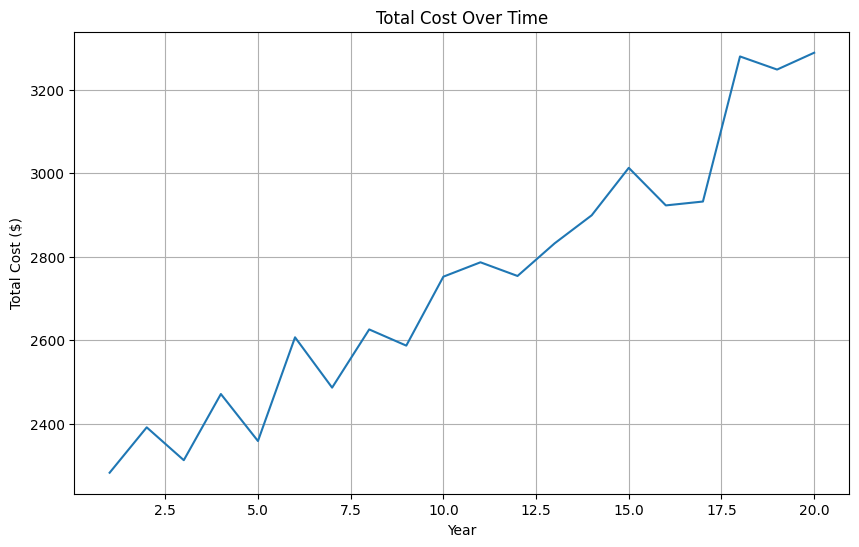

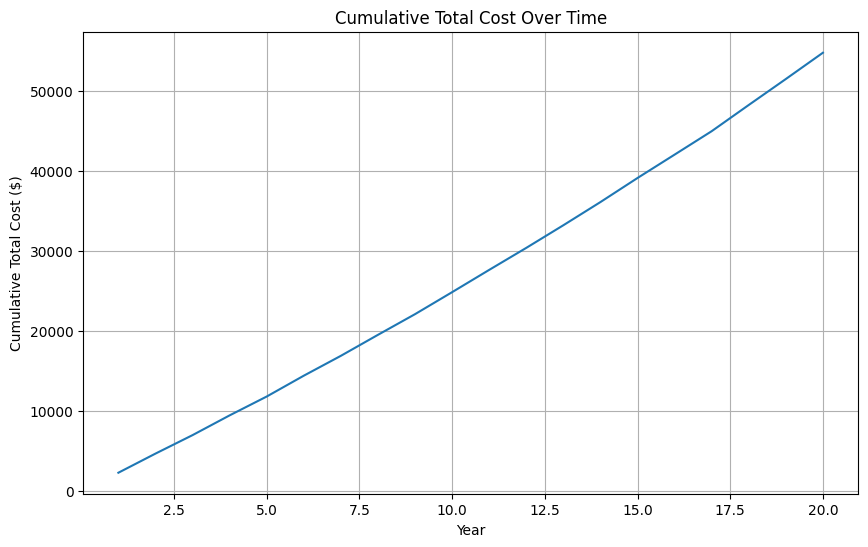

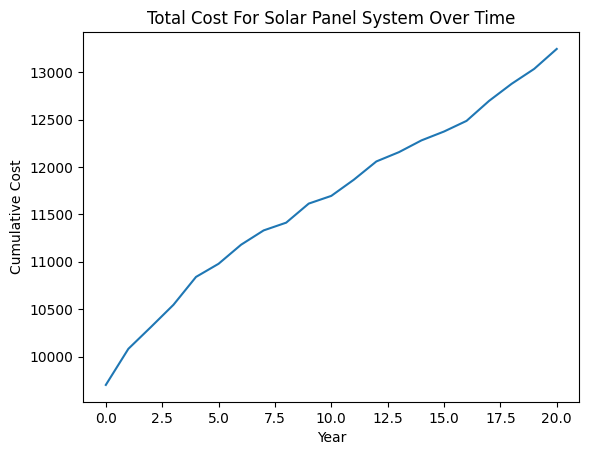

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1125)

# Define constants
MEAN_USAGE = 877
STD_DEV_USAGE = 50
NUM_MONTHS = 12
STD_DEV_COST = 100

# Define monthly electricity usage
monthly_usage = np.random.normal(MEAN_USAGE, STD_DEV_USAGE, NUM_MONTHS)
monthly_usage = np.sort(monthly_usage)[::-1]  # Sort in descending order

# Define the months and their assigned numbers
months = {
    'January': 7,
    'February': 8,
    'March': 10,
    'April': 11,
    'May': 4,
    'June': 3,
    'July': 1,
    'August': 2,
    'September': 5,
    'October': 12,
    'November': 9,
    'December': 6
}

# Sort the months by their assigned numbers
sorted_months = sorted(months, key=months.get)

# Create a dictionary with sorted months as keys and monthly electricity usage as values
monthly_values = dict(zip(sorted_months, monthly_usage))

# Define initial rates for each month in dollars per kilowatt hour
rates = {
    'January': 0.2357,
    'February': 0.236,
    'March': 0.2118,
    'April': 0.1981,
    'May': 0.2047,
    'June': 0.2163,
    'July': 0.2227,
    'August': 0.2233,
    'September': 0.2223,
    'October': 0.227,
    'November': 0.2272,
    'December': 0.2252
}

# Average sunlight hours for each month
sunlight_hours = {
    'January': 2.08, 'February': 3.06, 'March': 3.9, 'April': 5.05,
    'May': 6.02, 'June': 6.35, 'July': 6.34, 'August': 5.52,
    'September': 4.52, 'October': 3.31, 'November': 2.27, 'December': 1.64
}

# Amount of days in each month
days_in_month = {
    'January': 31, 'February': 28, 'March': 31, 'April': 30,
    'May': 31, 'June': 30, 'July': 31, 'August': 31,
    'September': 30, 'October': 31, 'November': 30, 'December': 31
}


def update_rates():
    """Update the price of electricity by 1.7% each year."""
    for month in rates:
        rates[month] *= 1.017

def calculate_yearly_total():
    """Calculate the total cost for a year."""
    yearly_total = 0
    for month, mean_usage in monthly_values.items():
        usage = np.random.normal(mean_usage, STD_DEV_COST)
        cost = usage * rates[month]
        yearly_total += cost
    return round(yearly_total, 2)

def simulate_total_cost(num_years):
    """Simulate the total cost over a number of years."""
    total_costs = []
    for _ in range(num_years):
        update_rates()
        yearly_total = calculate_yearly_total()
        total_costs.append(yearly_total)
    return total_costs

# Simulate over 20 years and print the total cost
num_years = 20
total_costs = simulate_total_cost(num_years)

# Plot the total costs over time for each month
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), total_costs)
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.title('Total Cost Over Time')
plt.grid(True)
plt.show()

# Plot the total cumulative costs over time
cumulative_costs = np.cumsum(total_costs)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), cumulative_costs)
plt.xlabel('Year')
plt.ylabel('Cumulative Total Cost ($)')
plt.title('Cumulative Total Cost Over Time')
plt.grid(True)
plt.show()

class SolarPanelSystem:
    def __init__(self, kw_of_system, cost_per_kw=3000):
        self.kw_of_system = kw_of_system
        self.cost_per_kw = cost_per_kw
        self.cost_of_installation = self.kw_of_system * self.cost_per_kw
        self.fed_tax_credit = 0.30 * self.cost_of_installation
        self.ny_tax_credit = 5000 if self.cost_of_installation * 0.25 > 5000 else self.cost_of_installation * 0.25
        self.cost_of_system = self.cost_of_installation - self.fed_tax_credit - self.ny_tax_credit
        self.coned_cbc_charge = 1.09 * self.kw_of_system
        self.cumulative_costs = [self.cost_of_system]
        self.excess = 0

    def simulate_month_generated(self, month):
        # Generate a normal distribution for each day in the month
        hours = np.random.normal(sunlight_hours[month], size=days_in_month[month])
        
        # Calculate the total electricity generated in the month
        month_generated = np.sum(hours) * self.kw_of_system        
        
        return month_generated
    
    def simulate_month_used(self, month):
        # Generate a normal distribution for each day in the month
        usage = np.random.normal(monthly_values[month], STD_DEV_COST)
        
        # Calculate the total electricity used in the month
        month_used = np.sum(usage)
        
        return month_used
    
    def simulate_month(self, month):
        month_generated = self.simulate_month_generated(month)
        month_used = self.simulate_month_used(month)
        
        if month_generated > month_used:
            excess = month_generated - month_used
            # Save the excess for future months - net metering
            self.excess += excess
        else:
            deficit = month_used - month_generated
            if self.excess > 0:
                if self.excess >= deficit:
                    self.excess -= deficit
                    deficit = 0
                else:
                    deficit -= self.excess
                    self.excess = 0
            cost = deficit * rates[month]
            self.cost_of_system += cost
            self.cost_of_system += self.coned_cbc_charge

    def simulate_year(self):
        # Define the order of months for the simulation
        sorted_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.cost_of_system -= self.excess * 0.1
        self.excess = 0
        for month in sorted_months:
            self.simulate_month(month)
        
        # Reset excess in May
        #self.excess = 0  # Reset excess at the end of May

    def simulate_years(self, num_years):
        for _ in range(num_years):
            self.simulate_year()
            self.cumulative_costs.append(self.cost_of_system)
        return self.cumulative_costs

    def plot_costs(self):
        plt.plot(range(len(self.cumulative_costs)), self.cumulative_costs)
        plt.xlabel('Year')
        plt.ylabel('Cumulative Cost')
        plt.title('Total Cost For Solar Panel System Over Time')
        plt.show()

# Create a solar panel system with 5 kw
solar_panel_system = SolarPanelSystem(7)

# Simulate 20 years
cumulative_costs = solar_panel_system.simulate_years(20)

# Plot the cumulative costs over time
solar_panel_system.plot_costs()
